<a href="https://colab.research.google.com/github/dionysus-laughed/school_cs4410/blob/main/summers_hw3_cs4410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [16]:
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_scores.append(scores.mean())

In [18]:
cv_scores = np.array(cv_scores)
optimal_k = k_range[np.argmax(cv_scores)]
optimal_k

13

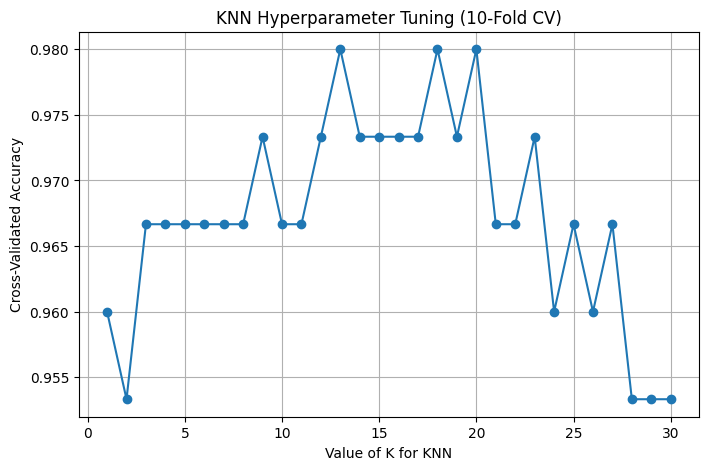

<Figure size 640x480 with 0 Axes>

In [19]:
#graph 1
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning (10-Fold CV)')
plt.grid(True)
plt.show()
#save
plt.savefig("knn-1.jpg")

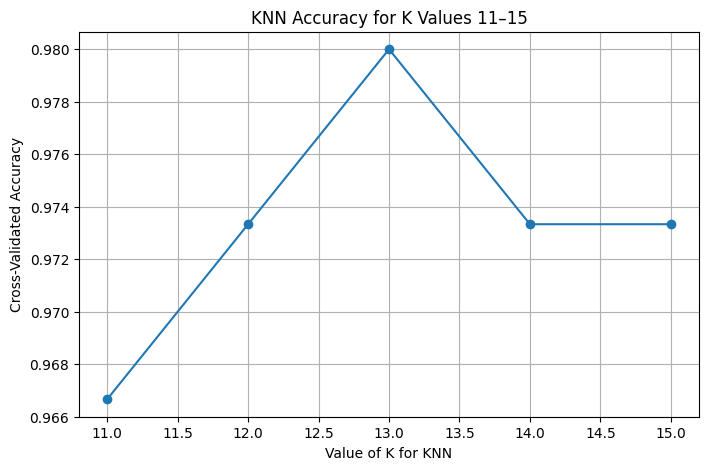

<Figure size 640x480 with 0 Axes>

In [20]:
#second plot
k_zoom = range(11, 16) #adjusting range
scores_zoom = cv_scores[10:15]
plt.figure(figsize=(8, 5))
plt.plot(k_zoom, scores_zoom, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for K Values 11–15')
plt.grid(True)
plt.show()
#save
plt.savefig("knn2-1.jpg")

In [21]:
#confirm
param_grid = {'n_neighbors': list(range(1, 31))}

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=10,
    scoring='accuracy'
)

grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [22]:
grid.best_params_

{'n_neighbors': 13}

In [23]:
grid.best_score_

np.float64(0.9800000000000001)